In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%config InlineBackend.figure_formats = ['svg']
plt.style.use('seaborn-whitegrid')

Станок делает шарики с d = 1 мм.
Гипотеза: правильно станок работает?
H$_0$ - M(X) = 1 мм,
H$_1$ - M(X) != 1 мм.

Внизу диаметры шариков

In [2]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
                    1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
                    0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ])

In [3]:
samples.mean(), samples.std(ddof=1)

(1.1084541666666665, 0.27936526343958135)

In [4]:
samples.std(ddof=1) / np.sqrt(samples.shape[0])

0.057025195607097914

Нулевая гипотеза утверждает: математическое ожидание диаметра подшипника равно $1$ мм. Альтернативная гипотеза заключается в том, что математическое ожидание отлично от $1$.

__Выбор статистики $S$__

Будем считать, что в нашем случае среднее квадратическое отклонение известно и равно $0.25$. Значит, надо использовать статистику
$$Z = \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}},$$
и при условии верности нулевой гипотезы она имеет стандартное нормальное распределение. В нашем случае:
$$Z = \dfrac{\overline{X} - 1}{0.25/ \sqrt{n}}$$

__Выбор уровня значимости__

Ошибки первого и второго рода возникают в задачах, в которых требуется определить, произошло какое-то событие или нет.

In [5]:
alpha = 0.05

__Критическая область__

При проведении статистического теста мы строим критическую область для статистики $S(X)$, построенной ранее. Мы можем это сделать, потому что знаем распределение этой статистики, в частности, её функцию распределения $F_S(x)$.

Кроме того, к этому моменту мы уже зафиксировали уровень значимости $\alpha$. Это значение является вероятностью попасть в критическую область.

Как правило, используемые в статистике распределения имеют функцию плотности в форме «колокола»: ярко выраженный пик в центре и хвосты по краям. 

Некоторые распределения имеют два хвоста, некоторые — один. Кроме того, хвосты могут быть как конечными, так и уходить в бесконечность.


Критические области представляют собой как раз вот эти «хвосты» распределения. Число хвостов критической области определяется числом «сторон» у альтернативной гипотезы.

Например, если альтернативная гипотеза заключается в том, что мат. ожидание _не равно_ какому-то числу, то в соответствии с этой гипотезой оно может быть как больше, так и меньше, т.е. альтернативная гипотеза _двухсторонняя_. В этом случае и критическая область будет двухсторонней, т.е. будет иметь два «хвоста».

Как правило, критические области строят следующим образом:
* Левосторонняя область: $\Omega_\alpha = (-\infty, t_\alpha)$.
* Правосторонняя область: $\Omega_\alpha = (t_{1 - \alpha} , \infty)$.
* Двусторонняя область: $\Omega_\alpha = \left( -\infty, t_{\alpha / 2}\right) \cup \left( t_{1 - \alpha / 2} , \infty \right)$.

Здесь $t_x$ обозначает квантиль порядка $x$, т.е. $F_S(t_x) = x$.

In [6]:
t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

t1, t2

(-1.9599639845400545, 1.959963984540054)

Итак, критическая область:
$$\Omega_\alpha = (-\infty, -1.96) \cup (1.96, \infty)$$

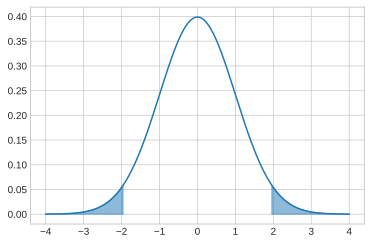

In [7]:
ox = np.linspace(-4, 4, 500)
oy = stats.norm.pdf(ox)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.norm.pdf(ox_left)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.norm.pdf(ox_right)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

Статистический тест:

In [8]:
def statistic(samples: np.ndarray) -> float:
    return (samples.mean() - 1) / (0.25 / np.sqrt(samples.shape[0]))

In [9]:
S = statistic(samples)
S

2.1252589504967747

Попадает в крит. область, значит отвергаем нулевую гипотезу.

In [10]:
def statistic(samples: np.ndarray) -> float: 
    return (samples.mean() - 1) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

In [11]:
n = samples.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n-1)
t2 = stats.t.ppf(1 - alpha / 2, df=n-1)

t1, t2

(-2.068657610419041, 2.0686576104190406)

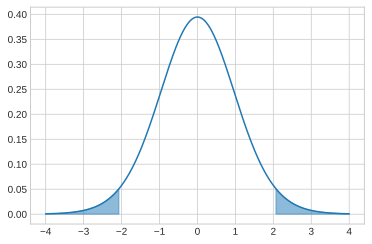

In [12]:
ox = np.linspace(-4, 4, 500)
oy = stats.t.pdf(ox, df=n-1)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.t.pdf(ox_left, df=n-1)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.t.pdf(ox_right, df=n-1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')
plt.show()

In [13]:
S = statistic(samples)
S

1.9018640008517087

Статистика не попадает в крит. область => мы не можем отвергнуть нулевую гипотезу.

### __P-значение__

In [14]:
n = samples.shape[0]
S = statistic(samples)

n, S

print('alpha\tresult')
print('-------------')

for alpha in np.linspace(0, 0.15, 15):
    t1 = stats.t.ppf(alpha / 2, df=n - 1)
    t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)
    
    print(round(alpha, 3), '\t', t1 <= S <= t2)

alpha	result
-------------
0.0 	 True
0.011 	 True
0.021 	 True
0.032 	 True
0.043 	 True
0.054 	 True
0.064 	 True
0.075 	 False
0.086 	 False
0.096 	 False
0.107 	 False
0.118 	 False
0.129 	 False
0.139 	 False
0.15 	 False


In [15]:
p_left = stats.t.cdf(S, df=n-1)
p_right = 1 - stats.t.cdf(S, df=n-1)

pvalue = 2 * min(p_left, p_right)
pvalue

0.06978674686298825

1) Выброка
2) Мат. ожидание в соответствии с H$_0$

In [16]:
stats.ttest_1samp(samples, popmean=1)

Ttest_1sampResult(statistic=1.901864000851709, pvalue=0.06978674686298816)

Построим доверительный интервал для мат. ожидания диаметра подшипника, используя выборку из примера 1. Будем считать, что дисперсия незивестна, и использовать t-статистику.

In [17]:
n = samples.shape[0]

mean = samples.mean()
std = samples.std(ddof=1)

n, mean, std

(24, 1.1084541666666665, 0.27936526343958135)

In [18]:
p = 0.95
alpha = 1 - p

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-2.0686576104190406, 2.0686576104190406)

In [19]:
(mean + t1 * std / np.sqrt(n), mean + t2 * std / np.sqrt(n))

(0.9904885617884089, 1.226419771544924)

__Задача 1__

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти ширину доверительного интервала для оценки математического ожидания `mu` с надёжностью 0.95, если выборочное среднее равно 80, а объём выборки равен 256.

In [20]:
p = 0.95
std = 16
mean = 80
n = 256
alpha = 1 - p

t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

t1, t2

(-1.959963984540054, 1.959963984540054)

In [21]:
print((mean + t1 * (std / np.sqrt(n)), mean + t2 * (std / np.sqrt(n))), 
round((mean + t2 * (std / np.sqrt(n))) - (mean + t1 * (std / np.sqrt(n))), 8))

(78.04003601545995, 81.95996398454005) 3.91992797


__Задача 2__

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:
```
202, 203, 199, 197, 195, 201, 200, 204, 194, 190
```
Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%? Найдите P-значение для данного теста и укажите его в качестве ответа.

H$_0$ - средний вес пачки печенья составляет 200 г.

H$_1$ - средний вес пачки печенья не составляет 200 г.

In [22]:
def statistic(mean, smean, std, n):
    return (smean - mean) / (std / np.sqrt(n))

weights = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
mean = 200
alpha = 0.01
n = weights.shape[0]
sample_mean = weights.mean()
std = weights.std(ddof=1)

t1 = stats.t.ppf(alpha / 2, df=n-1)
t2 = stats.t.ppf(1 - alpha / 2, df=n-1)
S = statistic(mean, sample_mean, std, n)

p_left = stats.t.cdf(S, df=n-1)
p_right = 1 - stats.t.cdf(S, df=n-1)
pvalue = 2 * min(p_left, p_right)

round(pvalue, 8), alpha

(0.3145666, 0.01)

__Задача 3__

Дана выборка диаметров подшипников из примера 1 с занятия 5:
```
samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
```
Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна `0.0625` при уровне значимости `alpha = 0.05`. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: `H = (n - 1) * sample_variance / variance`, где `n` - число элементов в выборке, `sample_variance` - несмещённая оценка дисперсии, `variance` - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром `df = n - 1`. Её квантили можно найти с помощью функции `scipy.stats.chi2.ppf`.

В качестве ответа запишите 1, если нулевая гипотеза верна, и 0 иначе.

H$_0$ - D(X) $=$ 0.0625

H$_1$ - D(X) $\neq$ 0.0625

In [23]:
def statistic(n, sample_variance, variance):
    return (n - 1) * sample_variance / variance

samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
                    1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
                    0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ])
alpha = 0.05
variance = 0.0625
sample_variance = samples.var(ddof=1)
n = samples.shape[0]

t1 = stats.chi2.ppf(alpha / 2, df=n-1)
t2 = stats.chi2.ppf(1 - alpha / 2, df=n-1)
S = statistic(n, sample_variance, variance)

int(t1 <= S <= t2)

1